Midterm Project

we are trying to estimate price of house, apartment....


In [8]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from custom_utils import df_spliter_by_data_type
from custom_utils import y_from_x_spliter
from custom_utils import outliers_remover
from custom_utils import df_trainer
from custom_utils import data_scaler
from custom_utils import production_data_scaler
from custom_utils import model_generator
from custom_utils import plot_builder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [9]:
sourceDf = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')
list(sourceDf.columns.values)

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

#functions

In [10]:
def df_cleaner(df):
    df = df.drop(
        ['date', 'waterfront', 'zipcode', 'lat', 'long', 'id'],
        errors='ignore',
        axis='columns'
    )
    df = df.reindex(sorted(df.columns), axis=1)
    return df

drop un usable columns

In [11]:
sourceDf = df_cleaner(sourceDf)
list(sourceDf.columns.values)

['bathrooms',
 'bedrooms',
 'condition',
 'floors',
 'grade',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_living15',
 'sqft_lot',
 'sqft_lot15',
 'view',
 'yr_built',
 'yr_renovated']

split price as Y and the res as X

In [12]:
X, Y = y_from_x_spliter(sourceDf, 'price')

removing outliers

In [13]:
X = outliers_remover(X)

Split Numerical from categorical
date type is not count as categorical, so we got no column in categorical

In [14]:
numerical, categorical = df_spliter_by_data_type(X)

#get dummies from categorical
#there is no categorical column so to avoid errors this step is ignored

In [15]:
#categorical_dummies = pd.get_dummies(categorical, drop_first=True)
#categorical_dummies

In [16]:
x_train, x_test, y_train, y_test, c_train, c_test = df_trainer(X, Y, categorical)

scale data

In [17]:
x_train_scaled, x_test_scaled = data_scaler(x_train, x_test, _, _, scale_categorical=False)

building a model

In [18]:
model, model_score = model_generator(x_train_scaled, x_test_scaled, y_train, y_test)

predict

In [19]:
y_pred = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

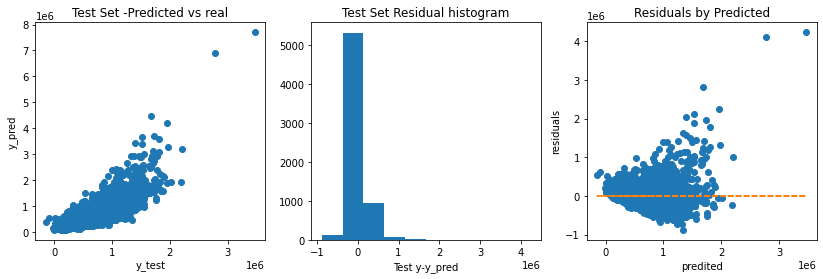

In [20]:
data_plot = plot_builder(
    y_test=y_test,
    y_pred=y_pred,
)
data_plot

check R2 score

In [21]:
R2 = r2_score(y_test, y_pred)
R2_train = model.score(x_train_scaled, y_train)
R2_test = model.score(x_test_scaled, y_test)
R2_train
# R2_test

0.6402987157881561

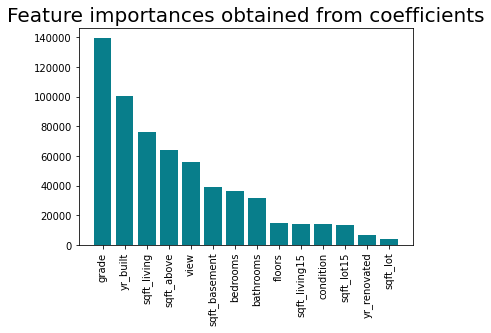

In [22]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [23]:

# button = widgets.Button(description="Do you wanna know the price of your home?")
# button
# output = widgets.Output()

## Test with fake data

your estimate price is:  178848.9


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


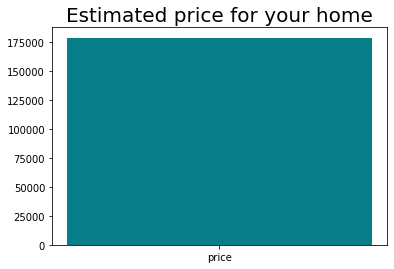

In [24]:
# test with fake data
state = {
    "bedrooms": 2,
    "bathrooms": 1,
    "sqft_living":500,
    "sqft_lot": 10,
    "floors": 1,
    "yr_built":2000,
    "view": 2,
    "condation": 2,
    "grade": 7,
    "sqft_above": 20,
    "sqft_basement": 3,
    "yr_renovated": 2000,
    "sqft_living15": 1000,
    "sqft_lot15": 1200
}

fake_df = pd.DataFrame(state, index=[0])
fake_df = df_cleaner(fake_df)
fake_numerical_scaled = production_data_scaler(fake_df, x_train)
y_pred_train_fake = model.predict(fake_numerical_scaled)
plt.bar(x='price', height=np.round(y_pred_train_fake, 1), color='#087E8B')
plt.rcParams["figure.figsize"] = (20, 20)
plt.title('Estimated price for your home', size=20)
plt.xticks(rotation='horizontal')
print('your estimate price is: ',abs(np.round(y_pred_train_fake, 1)[0]))
plt.show()

